In [1]:
from __future__ import print_function
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import initializers,regularizers
from tensorflow.keras.optimizers import RMSprop
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import normalize, to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
sns.set()
np.random.seed(100)

In [2]:
data=pd.read_csv("bank.csv")
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# Data Preprocessing

In [7]:
numerical="age	balance	day	duration	campaign	pdays	previous".split()
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [8]:
categorical=[col for col in data.columns.to_list() if col not in numerical ]
categorical.remove('deposit')
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [9]:
X_train, X_test, y_train,y_test = train_test_split(data[numerical+categorical], data['deposit'], test_size = 0.2,random_state=100)
X_train, X_valid, y_train,y_valid = train_test_split(X_train, y_train, test_size = 0.2,random_state=100)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(7143, 16)
(1786, 16)
(2233, 16)


In [10]:
#1- normalize numerical data
scaler=StandardScaler()
scaler.fit(X_train[numerical])
X_train_num=scaler.transform(X_train[numerical])
X_valid_num=scaler.transform(X_valid[numerical])
X_test_num=scaler.transform(X_test[numerical])

In [11]:
#2- encode categorical data
onehotx=OneHotEncoder(drop='first',sparse=False)
onehotx.fit(X_train[categorical])
X_train_cat=onehotx.transform(X_train[categorical])
X_valid_cat=onehotx.transform(X_valid[categorical])
X_test_cat=onehotx.transform(X_test[categorical])


y_train=np.where(y_train=='yes',1,0)
y_valid=np.where(y_valid=='yes',1,0)
y_test=np.where(y_test=='yes',1,0)

In [12]:
# concatenate data

X_train=np.concatenate((X_train_num,X_train_cat),axis=1)

X_valid=np.concatenate((X_valid_num,X_valid_cat),axis=1)
X_test=np.concatenate((X_test_num,X_test_cat),axis=1)

# Model construction
## Logistic Regression

In [13]:
logreg = LogisticRegression(random_state=100).fit(X_train, y_train)

print("Train Accuracy={:.2f}".format(logreg.score(X_train,y_train)))
print("Validation Accuracy={:.2f}".format(logreg.score(X_valid,y_valid)))
print("Test Accuracy={:.2f}".format(logreg.score(X_test,y_test)))

Train Accuracy=0.82
Validation Accuracy=0.83
Test Accuracy=0.83


## ANN Model

In [14]:
# creating a model
initializer = tf.keras.initializers.he_uniform()
kernelregulizer = regularizers.l2(l=0.0002)
activityregulizer = None
dropout_rate=0.3
model= Sequential([
   Dense(512, input_dim = 42, activation='relu',kernel_initializer=initializer,bias_initializer='ones',activity_regularizer=activityregulizer,kernel_regularizer=kernelregulizer),
   Dropout(dropout_rate),  
   Dense(512, activation='relu',kernel_initializer=initializer,bias_initializer='ones',activity_regularizer=activityregulizer,kernel_regularizer=kernelregulizer),
   Dropout(dropout_rate), 
   Dense(512, activation='relu',kernel_initializer=initializer,bias_initializer='ones',activity_regularizer=activityregulizer,kernel_regularizer=kernelregulizer),
   Dropout(dropout_rate), 
   Dense(512, activation='relu',kernel_initializer=initializer,bias_initializer='ones',activity_regularizer=activityregulizer,kernel_regularizer=kernelregulizer),
   Dropout(dropout_rate), 
   Dense(1, activation='sigmoid',kernel_initializer=initializer,bias_initializer='ones',activity_regularizer=activityregulizer,kernel_regularizer=kernelregulizer) ])

C:\Users\hp\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [15]:
opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=["accuracy"])
#print(model.get_weights())

In [16]:
stopcallback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3,min_delta=0.001)
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs= 100,verbose=1,callbacks=[stopcallback])


Epoch 1/100
224/224 [==============================] - 9s 25ms/step - loss: 1.8606 - accuracy: 0.6660 - val_loss: 1.3593 - val_accuracy: 0.7200
Epoch 2/100
224/224 [==============================] - 5s 22ms/step - loss: 1.3533 - accuracy: 0.7476 - val_loss: 1.2195 - val_accuracy: 0.8007
Epoch 3/100
224/224 [==============================] - 5s 22ms/step - loss: 1.2666 - accuracy: 0.7792 - val_loss: 1.1712 - val_accuracy: 0.8108
Epoch 4/100
224/224 [==============================] - 5s 22ms/step - loss: 1.2006 - accuracy: 0.7959 - val_loss: 1.1236 - val_accuracy: 0.8303
Epoch 5/100
224/224 [==============================] - 5s 23ms/step - loss: 1.1634 - accuracy: 0.7980 - val_loss: 1.1114 - val_accuracy: 0.8231
Epoch 6/100
224/224 [==============================] - 5s 22ms/step - loss: 1.1265 - accuracy: 0.8064 - val_loss: 1.0723 - val_accuracy: 0.8309
Epoch 7/100
224/224 [==============================] - 5s 24ms/step - loss: 1.0836 - accuracy: 0.8138 - val_loss: 1.0343 - val_accuracy:

224/224 [==============================] - 5s 21ms/step - loss: 0.4203 - accuracy: 0.8468 - val_loss: 0.4203 - val_accuracy: 0.8477
Epoch 58/100
224/224 [==============================] - 5s 21ms/step - loss: 0.4185 - accuracy: 0.8473 - val_loss: 0.4217 - val_accuracy: 0.8438
Epoch 59/100
224/224 [==============================] - 5s 22ms/step - loss: 0.4196 - accuracy: 0.8449 - val_loss: 0.4303 - val_accuracy: 0.8460


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               22016     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               2

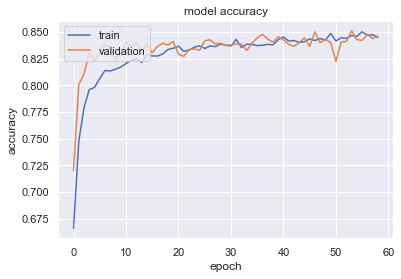

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

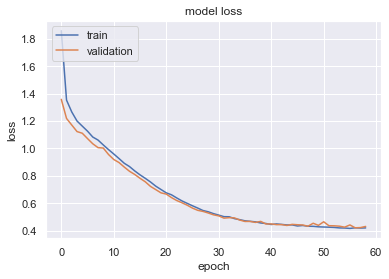

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [24]:
model.evaluate(
  X_test,
  y_test)

70/70 [==============================] - 0s 4ms/step - loss: 0.4185 - accuracy: 0.8473


[0.4184844493865967, 0.8472906351089478]